In [1]:
import numpy as np
import sklearn as sl
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
import pandas as pd

# za normalizaciju, standardizaciju
from sklearn import preprocessing

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

# rad sa arff fajlovima
#import arff

# graficki prikaz
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# 
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Cross validation attempts to avoid overfitting while still 
# producing a prediction for each observation dataset.
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# Compute precision, recall, F-measure and support
# preciznost, odziv, F-mera, podrska

# ovi podaci se nalaze u sklearn.model_selection

# prognozirani pozitivni/negativni koji su zaista pozitivni od svih prognoziranih pozitivnih/negativnih 
# The precision is the ratio tp / (tp + fp) where tp is the number 
# of true positives and fp the number of false positives. 
# The precision is intuitively the ability of the classifier 
# to not label a sample as positive if it is negative

# odziv
# => prognozirani pozitivni/negativni koji su zaista pozitivni od ukupno pozitivnih/negativnih
# The recall is the ratio tp / (tp + fn) where tp is the number 
# of true positives and fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples

# The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, 
# where an F-beta score reaches its best value at 1 and worst score at 0

# The F-beta score weights the recall more than the precision by a factor of beta. 
# beta = 1.0 means recall and precision are equally important

# svi koji pripadaju datoj klasi
# The support is the number of occurrences of each class in y_test

from sklearn.metrics import classification_report

# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# oversampling
from imblearn.over_sampling import SMOTE

from collections import Counter

# feature selection
from sklearn.feature_selection import SelectPercentile, f_classif

In [2]:
from arff2pandas import a2p
    
with open('JM1.arff') as f:
    df = a2p.load(f)

print(df.shape)

(10878, 22)


In [3]:
# uklanjamo instance koje imaju nedostajuce vrednosti
df = df.dropna()
print(df.shape)

(10878, 22)


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.columns

Index(['LOC_BLANK@NUMERIC', 'BRANCH_COUNT@NUMERIC',
       'LOC_CODE_AND_COMMENT@NUMERIC', 'LOC_COMMENTS@NUMERIC',
       'CYCLOMATIC_COMPLEXITY@NUMERIC', 'DESIGN_COMPLEXITY@NUMERIC',
       'ESSENTIAL_COMPLEXITY@NUMERIC', 'LOC_EXECUTABLE@NUMERIC',
       'HALSTEAD_CONTENT@NUMERIC', 'HALSTEAD_DIFFICULTY@NUMERIC',
       'HALSTEAD_EFFORT@NUMERIC', 'HALSTEAD_ERROR_EST@NUMERIC',
       'HALSTEAD_LENGTH@NUMERIC', 'HALSTEAD_LEVEL@NUMERIC',
       'HALSTEAD_PROG_TIME@NUMERIC', 'HALSTEAD_VOLUME@NUMERIC',
       'NUM_OPERANDS@NUMERIC', 'NUM_OPERATORS@NUMERIC',
       'NUM_UNIQUE_OPERANDS@NUMERIC', 'NUM_UNIQUE_OPERATORS@NUMERIC',
       'LOC_TOTAL@NUMERIC', 'Defective@{Y,N}'],
      dtype='object')

In [6]:
# df

In [7]:
df = df.drop(columns = ['CYCLOMATIC_COMPLEXITY@NUMERIC', 'DESIGN_COMPLEXITY@NUMERIC', 'ESSENTIAL_COMPLEXITY@NUMERIC', 'BRANCH_COUNT@NUMERIC'])

In [8]:
df.columns

Index(['LOC_BLANK@NUMERIC', 'LOC_CODE_AND_COMMENT@NUMERIC',
       'LOC_COMMENTS@NUMERIC', 'LOC_EXECUTABLE@NUMERIC',
       'HALSTEAD_CONTENT@NUMERIC', 'HALSTEAD_DIFFICULTY@NUMERIC',
       'HALSTEAD_EFFORT@NUMERIC', 'HALSTEAD_ERROR_EST@NUMERIC',
       'HALSTEAD_LENGTH@NUMERIC', 'HALSTEAD_LEVEL@NUMERIC',
       'HALSTEAD_PROG_TIME@NUMERIC', 'HALSTEAD_VOLUME@NUMERIC',
       'NUM_OPERANDS@NUMERIC', 'NUM_OPERATORS@NUMERIC',
       'NUM_UNIQUE_OPERANDS@NUMERIC', 'NUM_UNIQUE_OPERATORS@NUMERIC',
       'LOC_TOTAL@NUMERIC', 'Defective@{Y,N}'],
      dtype='object')

In [9]:
# df

In [10]:
df['Defective@{Y,N}'].value_counts()

N    8776
Y    2102
Name: Defective@{Y,N}, dtype: int64

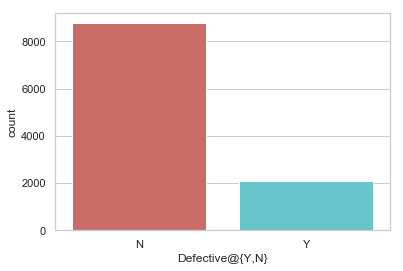

In [11]:
sns.countplot(x='Defective@{Y,N}', data=df, palette='hls')
plt.show()

In [12]:
# Grafik rasporedjenosti instanci po klasama pokazuje da postoji problem neravnomerne raspodele klasa instanci
# Posledica ove neravnomerne raspodele je da ce trenirani model dobro klasifikovati instance klase 'N', a lose
# klasifikovati instance cija je klasa 'Y'. 
# Medjutim, problem je u tome sto su instance od znacaja bas instance klase 'Y'
# Resenje ovog problema je over-sampling - dodavanje novih instanci koje pripadaju manje zastupljenoj klasi 'Y'
# Postoji vise metoda dodavanja novih instanci, a probacemo SMOTE


In [13]:
# kodiramo Y/N u 1/0
df['Defective@{Y,N}'] = pd.factorize(df['Defective@{Y,N}'])[0]

In [14]:
# ciljna kolona(defects@{false, true})
y_cols=['Defective@{Y,N}']

# lista atributa
X_cols=[i for i in df.columns if i not in y_cols]

In [15]:
X=df[X_cols]
y=df[y_cols]

In [16]:
type(y)

pandas.core.frame.DataFrame

In [17]:
np.set_printoptions(suppress='True')

In [18]:
X

,LOC_BLANK@NUMERIC,LOC_CODE_AND_COMMENT@NUMERIC,LOC_COMMENTS@NUMERIC,LOC_EXECUTABLE@NUMERIC,HALSTEAD_CONTENT@NUMERIC,HALSTEAD_DIFFICULTY@NUMERIC,HALSTEAD_EFFORT@NUMERIC,HALSTEAD_ERROR_EST@NUMERIC,HALSTEAD_LENGTH@NUMERIC,HALSTEAD_LEVEL@NUMERIC,HALSTEAD_PROG_TIME@NUMERIC,HALSTEAD_VOLUME@NUMERIC,NUM_OPERANDS@NUMERIC,NUM_OPERATORS@NUMERIC,NUM_UNIQUE_OPERANDS@NUMERIC,NUM_UNIQUE_OPERATORS@NUMERIC,LOC_TOTAL@NUMERIC
0,39.0,1.0,6.0,656.0,114.78,174.22,3483952.81,6.67,2702.0,0.01,193552.92,19997.18,784.0,1918.0,117.0,52.0,706.0
1,447.0,12.0,157.0,2824.0,210.28,384.45,31079782.27,26.95,8441.0,0.00,1726654.57,80843.08,3021.0,5420.0,609.0,155.0,3442.0
2,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1129.0
3,164.0,10.0,58.0,1588.0,202.98,213.53,9254819.86,14.45,4828.0,0.00,514156.64,43342.31,1730.0,3172.0,407.0,102.0,1824.0
4,37.0,8.0,42.0,133.0,108.14,46.32,232043.52,1.67,685.0,0.02,12891.31,5009.32,295.0,390.0,121.0,38.0,222.0
5,11.0,0.0,17.0,814.0,101.20,206.01,4294926.45,6.95,2033.0,0.00,238607.05,20848.47,813.0,1220.0,811.0,411.0,844.0
6,106.0,7.0,344.0,952.0,218.17,215.17,10100866.90,15.65,5669.0,0.00,561159.25,46943.69,2301.0,3368.0,262.0,49.0,1411.0
7,101.0,11.0,75.0,1339.0,106.50,337.36,12120796.16,11.98,4308.0,0.00,673377.60,35928.07,1556.0,2752.0,226.0,98.0,1532.0
8,67.0,4.0,1.0,391.0,233.07,58.04,785182.04,4.51,1780.0,0.02,43621.22,13527.84,718.0,1062.0,167.0,27.0,466.0
9,105.0,9.0,40.0,1124.0,122.60,269.46,8901671.32,11.01,3848.0,0.00,494537.33,33034.94,1432.0,2416.0,279.0,105.0,1280.0


In [19]:
# potrebno je izvrsiti normalizaciju podataka kako atributi 
# sa visokim vrednostima ne bi previse uticali na rezultat klasifikacije 

# X = preprocessing.normalize(X)

scaler = preprocessing.StandardScaler().fit(X)


In [20]:
scaler.mean_

array([    4.62566648,     0.3707483 ,     2.73901452,    26.25767604,
          29.4440513 ,    14.17973433, 36852.40336551,     0.22460011,
         114.41220813,     0.13516547,  2047.35567751,   673.89566924,
          46.39731568,    68.12290862,    16.75473433,    11.17944475,
          42.02767053])

In [21]:
X = scaler.transform(X)

In [22]:
type(X)

numpy.ndarray

In [23]:
# type(X[0])

In [24]:
X

array([[ 3.44767987,  0.32972654,  0.36189414, ...,  3.75897224,
         4.06385466,  8.66689787],
       [44.36929914,  6.09370285, 17.11940989, ..., 22.20786688,
        14.31792952, 44.38018219],
       [-0.4639455 , -0.19427131, -0.30396741, ..., -0.62826489,
        -1.11295984, 14.18835959],
       ...,
       [ 0.53903537, -0.19427131, -0.19299049, ..., -0.06579859,
         0.67901441, -0.00036119],
       [-0.26334932, -0.19427131, -0.30396741, ..., -0.32828287,
        -0.21697271, -0.41806042],
       [-0.26334932,  0.32972654, -0.30396741, ..., -0.10329635,
         0.08168966, -0.30058251]])

In [25]:
#X[0]

In [26]:
y = y.values.ravel()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [28]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, np.ravel(y_train))
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8039981617647058


In [29]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = clf
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, np.ravel(y_train), cv=kfold, scoring=scoring)
print("10-fold cross validation: ")
print("average accuracy: %.9f" % (results.mean()))
print("standard deviation: %.9f" % (results.std()))

10-fold cross validation: 
average accuracy: 0.805544725
standard deviation: 0.014840104


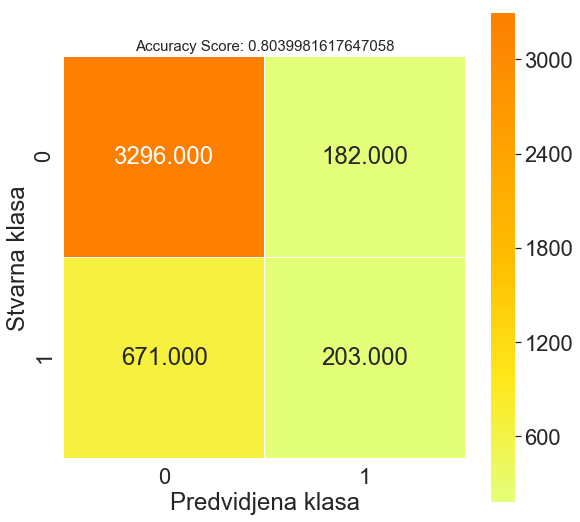

In [30]:
# matrica konfuzije
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.set(font_scale=2)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Wistia');
plt.ylabel('Stvarna klasa');
plt.xlabel('Predvidjena klasa');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);
figname = 'RF_basic_data_confussion_matrix.png'
plt.savefig(figname)
plt.show()

In [31]:
# preciznost, odziv, f-mera, podrska
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3478
           1       0.53      0.23      0.32       874

   micro avg       0.80      0.80      0.80      4352
   macro avg       0.68      0.59      0.60      4352
weighted avg       0.77      0.80      0.77      4352



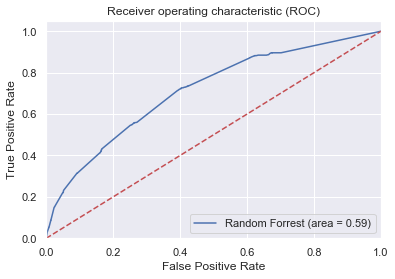

In [32]:
# The receiver operating characteristic (ROC) curve is 
# another common tool used with binary classifiers. 
# The dotted line represents the ROC curve of a purely 
# random classifier; a good classifier stays as far away 
# from that line as possible (toward the top-left corner)

logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
sns.set(font_scale=1)
plt.plot(fpr, tpr, label='Random Forrest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
figname = 'RF_basic_data_ROC.png'
plt.savefig(figname)
plt.show()

In [33]:
# oversampling na osnovnim podacima, bez izbora atributa

In [34]:
X_resampled, y_resampled = SMOTE(kind="svm").fit_sample(X, y)

In [35]:
print(sorted(Counter(y_resampled).items()))

[(0, 8776), (1, 8776)]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

In [37]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, np.ravel(y_train))
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8279447372169206


In [38]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = clf
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, np.ravel(y_train), cv=kfold, scoring=scoring)
print("10-fold cross validation: ")
print("average accuracy: %.9f" % (results.mean()))
print("standard deviation: %.9f" % (results.std()))

10-fold cross validation: 
average accuracy: 0.829645307
standard deviation: 0.009851892


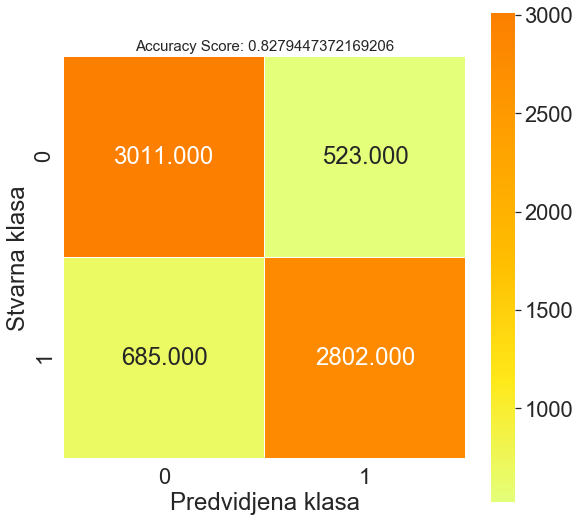

In [39]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.set(font_scale=2)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Wistia');
plt.ylabel('Stvarna klasa');
plt.xlabel('Predvidjena klasa');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);
figname = 'RF_oversampled_confussion_matrix.png'
plt.savefig(figname)
plt.show()

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      3534
           1       0.84      0.80      0.82      3487

   micro avg       0.83      0.83      0.83      7021
   macro avg       0.83      0.83      0.83      7021
weighted avg       0.83      0.83      0.83      7021



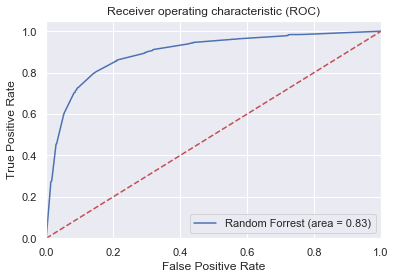

In [41]:
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
sns.set(font_scale=1)
plt.plot(fpr, tpr, label='Random Forrest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
figname = 'RF_oversampled_ROC.png'
plt.savefig(figname)
plt.show()

In [42]:
# pocetak izbora atributa

In [43]:
X_indices = np.arange(X.shape[-1])

In [44]:
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 60% most significant features
selector = SelectPercentile(f_classif, percentile=60)
selector.fit(X, y)

SelectPercentile(percentile=60,
         score_func=<function f_classif at 0x000002738EBD3D08>)

In [45]:
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

<BarContainer object of 17 artists>

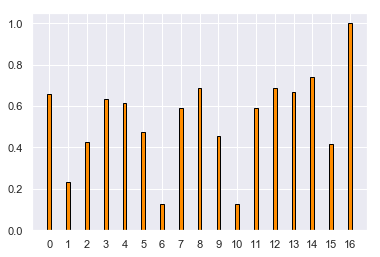

In [46]:
sns.set(font_scale=1)
plt.xticks(np.arange(0, len(X_indices)+1, 1.0))
plt.bar(X_indices , scores, width=.2, label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

In [47]:
df.columns

Index(['LOC_BLANK@NUMERIC', 'LOC_CODE_AND_COMMENT@NUMERIC',
       'LOC_COMMENTS@NUMERIC', 'LOC_EXECUTABLE@NUMERIC',
       'HALSTEAD_CONTENT@NUMERIC', 'HALSTEAD_DIFFICULTY@NUMERIC',
       'HALSTEAD_EFFORT@NUMERIC', 'HALSTEAD_ERROR_EST@NUMERIC',
       'HALSTEAD_LENGTH@NUMERIC', 'HALSTEAD_LEVEL@NUMERIC',
       'HALSTEAD_PROG_TIME@NUMERIC', 'HALSTEAD_VOLUME@NUMERIC',
       'NUM_OPERANDS@NUMERIC', 'NUM_OPERATORS@NUMERIC',
       'NUM_UNIQUE_OPERANDS@NUMERIC', 'NUM_UNIQUE_OPERATORS@NUMERIC',
       'LOC_TOTAL@NUMERIC', 'Defective@{Y,N}'],
      dtype='object')

In [48]:
df.columns[12]

'NUM_OPERANDS@NUMERIC'

In [49]:
scores[11]

0.5895287355892107

In [50]:
#
scores

array([0.65646193, 0.23139578, 0.4279089 , 0.63264885, 0.61235664,
       0.47346224, 0.12559268, 0.58977589, 0.68740898, 0.45404536,
       0.12559268, 0.58952874, 0.68562378, 0.66649189, 0.74215133,
       0.41652279, 1.        ])

In [51]:
#
np.argpartition(scores, -1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [52]:
# df.columns[15]

In [53]:
# df.columns[19]

In [54]:
ind = np.argpartition(scores, -10)[-10:]

In [55]:
df.columns[ind]

Index(['HALSTEAD_VOLUME@NUMERIC', 'HALSTEAD_ERROR_EST@NUMERIC',
       'HALSTEAD_CONTENT@NUMERIC', 'LOC_EXECUTABLE@NUMERIC',
       'LOC_BLANK@NUMERIC', 'NUM_OPERANDS@NUMERIC', 'NUM_OPERATORS@NUMERIC',
       'HALSTEAD_LENGTH@NUMERIC', 'NUM_UNIQUE_OPERANDS@NUMERIC',
       'LOC_TOTAL@NUMERIC'],
      dtype='object')

In [56]:
X_transformed = selector.transform(X)

In [57]:
# kraj izbora atributa

In [58]:
# izbor atributa bez oversampling-a

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.4, random_state=42)

In [60]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, np.ravel(y_train))
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8021599264705882


In [61]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = clf
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, np.ravel(y_train), cv=kfold, scoring=scoring)
print("10-fold cross validation: ")
print("average accuracy: %.9f" % (results.mean()))
print("standard deviation: %.9f" % (results.std()))

10-fold cross validation: 
average accuracy: 0.806613178
standard deviation: 0.016920839


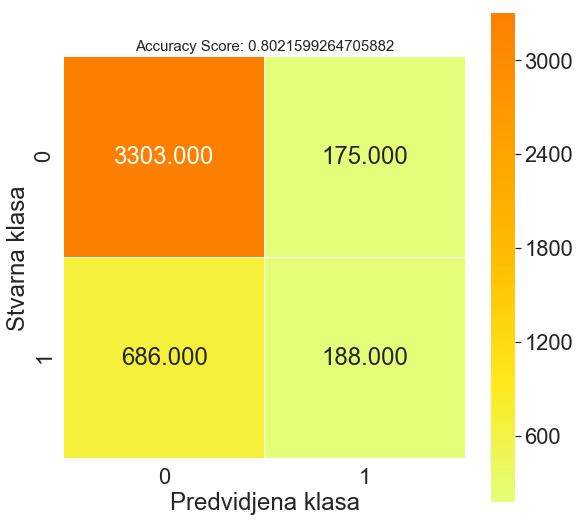

In [62]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.set(font_scale=2)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Wistia');
plt.ylabel('Stvarna klasa');
plt.xlabel('Predvidjena klasa');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);
figname = 'RF_feature_selection_confussion_matrix.png'
plt.savefig(figname)
plt.show()

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      3478
           1       0.52      0.22      0.30       874

   micro avg       0.80      0.80      0.80      4352
   macro avg       0.67      0.58      0.59      4352
weighted avg       0.77      0.80      0.77      4352



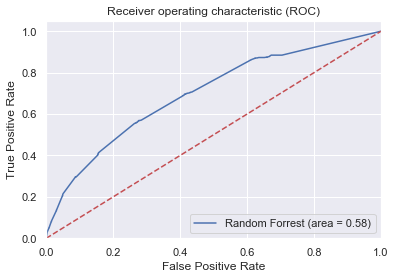

In [64]:
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
sns.set(font_scale=1)
plt.plot(fpr, tpr, label='Random Forrest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
figname = 'RF_feature_selection_ROC.png'
plt.savefig(figname)
plt.show()

In [65]:
# izbor atributa i oversampling

In [66]:
X_resampled, y_resampled = SMOTE(kind="svm").fit_sample(X_transformed, y)

In [67]:
X_resampled[0]

array([ 3.44767987, 10.56178454,  2.47905561,  9.97052766, 10.36876459,
        9.96394289,  7.34996544, 12.20895324,  3.75897224,  8.66689787])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

In [69]:
X_train[0]

array([-0.36364741, -0.37329678, -0.58025703, -0.33196952, -0.42239895,
       -0.33446018, -0.42247515, -0.41660316, -0.51577163, -0.45721972])

In [70]:
X_test[0]

array([-0.4639455 , -0.33975358, -0.34465713, -0.31650031, -0.38633491,
       -0.3112304 , -0.39258115, -0.37700392, -0.36578062, -0.44416662])

In [71]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, np.ravel(y_train))
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.827517447657029


In [72]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = clf
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, np.ravel(y_train), cv=kfold, scoring=scoring)
print("10-fold cross validation: ")
print("average accuracy: %.9f" % (results.mean()))
print("standard deviation: %.9f" % (results.std()))

10-fold cross validation: 
average accuracy: 0.819960229
standard deviation: 0.012242693


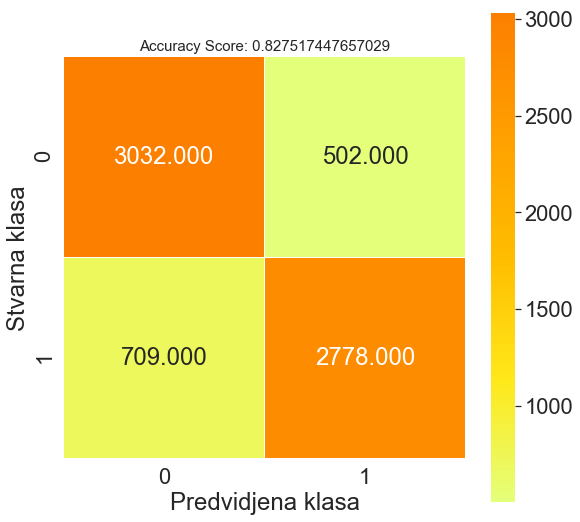

In [73]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.set(font_scale=2)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Wistia');
plt.ylabel('Stvarna klasa');
plt.xlabel('Predvidjena klasa');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);
figname = 'RF_feature_selection_oversampled_confussion_matrix.png'
plt.savefig(figname)
plt.show()

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      3534
           1       0.85      0.80      0.82      3487

   micro avg       0.83      0.83      0.83      7021
   macro avg       0.83      0.83      0.83      7021
weighted avg       0.83      0.83      0.83      7021



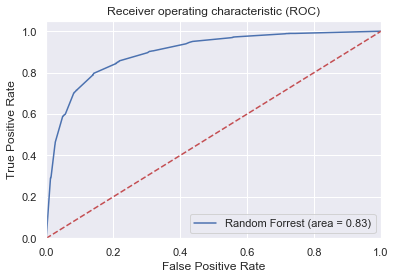

In [75]:
# The receiver operating characteristic (ROC) curve is 
# another common tool used with binary classifiers. 
# The dotted line represents the ROC curve of a purely 
# random classifier; a good classifier stays as far away 
# from that line as possible (toward the top-left corner)

logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
sns.set(font_scale=1)
plt.plot(fpr, tpr, label='Random Forrest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
figname = 'RF_feature_selection_oversampled_ROC.png'
plt.savefig(figname)
plt.show()

In [76]:
 # clf.predict([15, 51391.5957050955, 34.5, 591.0033506085982, 208, 1773010.0518257946, 46, 162, 16, 24])

In [77]:
# new_object = np.array([60, 151, 22, 134, 214109.69314276046, 147.48611111111111, 4657346797.746469, 10526.068664273025, 728, 0.0067802994632262924, 258741488.7636927, 31578205.992819075, 259, 469, 36, 41, 211])

# new_object = np.array([15, 38, 0, 15, 51391.5957050955, 34.5, 61168846.787989914, 591.0033506085982, 208, 0.028985507246376812, 3398269.2659994396, 1773010.0518257946, 46, 162, 16, 24, 53])

# new_object = np.array([2, 6, 0, 2, 409.10624136968926, 4.0, 6545.699861915028, 0.545474988492919, 12, 0.25, 363.64999232861265, 1636.424965478757, 1, 11, 1, 8, 8])

In [78]:
# new_object = preprocessing.normalize(new_object.reshape(1,-1))
# print(new_object)

In [79]:
# ind

In [80]:
# i = np.arange(17)
    
# print(i)
#new_object = np.delete(new_object, !ind)
#print(new_object)

In [81]:
# new_object = np.delete(new_object, [0, 1, 2, 6, 9, 10, 16])
# print(new_object)

In [82]:
# new_object = new_object.reshape(1, -1)

In [83]:
# r = clf.predict(new_object)

In [84]:
# r

In [85]:
f = open("c_attributes.txt")

In [86]:
instances = f.readlines()

In [87]:
# instances

In [88]:
f.close()

In [89]:
predictions = []

In [90]:
for i in instances:
    i = i.strip('\n')
    i = i.strip('\[')
    i = i.strip('\]')
    #i = np.array(i)
    #i = np.fromstring(i)
    i = np.array(i.split(','), dtype=float)
    # i = preprocessing.normalize(i.reshape(1,-1))
    i = scaler.transform(i.reshape(1, -1))
    print(i[0])
    i = np.delete(i, [0, 1, 2, 6, 9, 10, 16])
    # print(i)
    # print(clf.predict(i.reshape(1, -1)))
    #print(type(i))
    #print(clf.predict(i))
    
    predictions.append(clf.predict(i.reshape(1, -1))[0])

[   1.44171815   24.95762534    1.13873262    0.04599315 3779.94999781
    6.60701399 5688.84632199 9248.0333773     1.9858778    -0.79965551
 5688.8463301  9248.10284644    1.63024634    2.19034654   -0.02830084
    0.97767678    0.32596634]
[   0.03754494    9.76168778   -0.19299049   -0.35652518 1236.23776953
    6.189509   1656.28853766 2854.20826275    0.9881059    -0.7969293
 1656.28854002 2854.22966893    1.0921543     0.90337137   -0.17829185
    0.87812266   -0.235317  ]
[   2.44469901   33.86558874    0.80580184    0.14662274 3843.06521654
    6.47961533 5585.44192188 9239.76968671    1.92577106   -0.79885697
 5585.44192984 9239.83909373    1.89929236    1.91315189    0.15918793
    1.27633916    0.67840007]
[   -0.26334932    19.71764687     0.02896337     0.06276475
 10819.25042694    -0.18774058    97.44964284  2048.23291441
     0.87991377    -0.25891883    97.44964299  2048.248262
    -0.42247515     1.72835546    -0.51577163     0.47990616
    -0.02646739]
[   -0.163051

[   2.5449971    40.67756075    3.2472942     0.16339433 3235.86452226
    0.88473969  242.15693302 1765.42714914    0.68356508   -0.64161367
  242.15693337 1765.44037085    0.08572289    1.06836819    0.00919691
    0.77856853    0.86114348]
[    5.75453586    82.5973885      7.68637122     0.86780141
 16233.13165998     1.07297267  1509.32643152  9870.95808859
     1.95782799    -0.66252738  1509.32643367  9871.0322403
     0.7234616      2.74473584     0.60916097     0.77856853
     2.32309079]
[    6.15572821    87.83736697     8.24125585     0.9181162
 18268.79266402     1.08440111  1719.87332768 11178.11920319
     2.09006282    -0.66365952  1719.87333014 11178.20318096
     0.80317894     2.90973266     0.68415647     0.77856853
     2.5058342 ]
[    5.35334352    77.35741003     7.1314866      0.75040023
 13692.33814708     1.06006961  1255.20400067  8267.30875762
     1.77750776    -0.66123205  1255.20400247  8267.37085456
     0.64374426     2.50054056     0.53416546     0.77

[ -0.16305124  16.04966194  -0.30396741  -0.17203761 277.85614857
   2.86728261 101.51907814 335.22852207   0.09451902  -0.75285635
 101.51907829 335.23099285  -0.09364113   0.21698462  -0.40327837
   1.07723091  -0.10478599]
[  0.03754494  16.57365979  -0.30396741  -0.2223524  507.20713945
   1.8234088   93.81841396 435.22164729   0.15061864  -0.71558398
  93.8184141  435.22486973  -0.04381779   0.27638347  -0.25328736
   1.17678503  -0.06562669]
[  0.03754494  13.95367056  -0.30396741  -0.17203761 341.0067999
   3.19301603 147.94349894 448.24931465   0.16664711  -0.760455
 147.94349915 448.25263502  -0.01392379   0.28298334  -0.36578062
   1.17678503  -0.1308922 ]
[    3.14678561    67.92544879     8.9071174      0.01244996
  2760.86803487    11.73130326 11949.88308878 11455.61721107
     2.09807705    -0.81826848 11949.88310581 11455.70327481
     1.98897437     2.13754756     0.12169017     2.67009691
     1.61822334]
[ -0.26334932   9.76168778  -0.30396741  -0.32298198 203.8892120

[  -0.06275315   19.71764687   -0.30396741   -0.03786483 1093.02507232
    1.9615323   224.30956534  987.63477158    0.42310254   -0.72215849
  224.30956566  987.64214656    0.16544023    0.58657749   -0.1407941
    0.97767678   -0.00036119]
[ -0.16305124  13.42967271  -0.30396741  -0.2223524  239.06881531
   2.27943558  61.31250148 241.68296329   0.01838381  -0.7350183
  61.31250157 241.68473088  -0.15342913   0.13118627  -0.40327837
   1.07723091  -0.1700515 ]
[ -0.16305124  23.90962965  -0.30396741  -0.02109324 399.78786323
   4.6308237  322.64209951 716.71125267   0.32292463  -0.78301888
 322.64209998 716.7165911    0.08572289   0.47437965  -0.40327837
   1.07723091   0.09101052]
[   0.03754494   26.52961888   -0.30396741    0.14662274 1952.25407658
    2.39856368  539.69838431 2047.18682531    0.75970028   -0.73917003
  539.69838508 2047.20216504    0.43448625    0.96277023   -0.02830084
    0.97767678    0.18238223]
[  0.03754494  13.95367056  -0.30396741  -0.15526601 561.5801215

[    3.84887222    78.92940357     0.25091722     0.46528308
  6590.8649032     10.81689576 24498.54759799 25340.93041453
     3.17999838    -0.81615512 24498.5476329  25341.12085541
     2.63667775     3.49052145     0.4216722      2.76965103
     1.98371016]
[   0.13784302   13.42967271   -0.19299049   -0.12172282 1458.1203729
    8.20466643 3250.98645298 4342.70912545    1.27661826   -0.80774216
 3250.98645762 4342.74172083    1.28148298    1.25316462   -0.17829185
    1.17678503   -0.1308922 ]
[   0.43873728   12.90567486    0.13994029   -0.32298198 1809.78078229
    4.82677271 1566.42420832 3358.11309831    1.0882838    -0.78519434
 1566.42421056 3358.13829239    1.1818363     1.00896934   -0.06579859
    0.77856853   -0.10478599]
[    3.2470837     71.06943587    -0.30396741     0.38142509
  6089.64875925     9.28906606 17054.379178   20323.40347418
     2.84740775    -0.81176568 17054.37920231 20323.55619787
     2.34770239     3.13412833     0.38417445     2.47098866
     1.709

[    2.64529518    49.58552415     0.13994029     0.04599315
  4097.34944028    12.14177826 18917.63485045 17558.23404709
     2.6590733     -0.81911973 18917.63487741 17558.36598474
     2.26798505     2.8767333      0.15918793     2.57054278
     1.0960993 ]
[  0.53903537  24.95762534  -0.30396741  -0.30621039 672.07951986
   2.08459992 150.73601379 634.9474967    0.27083213  -0.72747806
 150.73601401 634.9522205   -0.09364113   0.50737901  -0.32828287
   1.17678503   0.20848843]
[  0.13784302  17.62165548  -0.30396741  -0.37329678 410.79559869
   0.94935746  33.19561344 233.06137392   0.00235535  -0.64931292
  33.19561349 233.06307671  -0.21321713   0.14438602  -0.29078511
   1.17678503  -0.02646739]
[  0.13784302  17.62165548  -0.30396741  -0.37329678 410.79559869
   0.94935746  33.19561344 233.06137392   0.00235535  -0.64931292
  33.19561349 233.06307671  -0.21321713   0.14438602  -0.29078511
   1.17678503  -0.02646739]
[  0.53903537  24.95762534  -0.30396741  -0.2558956  722.5201

[  0.53903537  24.95762534  -0.30396741  -0.2558956  722.52019538
   2.23490172 179.64040039 718.67862267   0.30689617  -0.73338138
 179.64040065 718.68397588  -0.04381779   0.5337785   -0.29078511
   1.27633916   0.20848843]
[  0.13784302  17.62165548  -0.30396741  -0.37329678 410.79559869
   0.94935746  33.19561344 233.06137392   0.00235535  -0.64931292
  33.19561349 233.06307671  -0.21321713   0.14438602  -0.29078511
   1.17678503  -0.02646739]
[  0.53903537  24.95762534  -0.30396741  -0.2558956  722.52019538
   2.23490172 179.64040039 718.67862267   0.30689617  -0.73338138
 179.64040065 718.68397588  -0.04381779   0.5337785   -0.29078511
   1.27633916   0.20848843]
[ -0.06275315  21.81363826   0.36189414  -0.08817962 600.22259792
   2.56088962 183.56188697 662.19725362   0.27884636  -0.74434745
 183.56188723 662.20218226   0.07575822   0.40838092  -0.25328736
   1.17678503   0.05185122]
[  0.03754494  18.66965118   0.36189414  -0.17203761 423.55371041
   1.8548794   80.28151083 367

[   0.13784302   26.52961888    3.2472942    -0.28943879 1293.86734557
    7.08977823 2211.84352039 3374.32881019    1.08026957   -0.80244621
 2211.84352355 3374.35412616    1.19180097    0.98916972   -0.1407941
    1.17678503    0.19543533]
[  -0.16305124   16.57365979   -0.30396741   -0.17203761 2151.20431021
    9.07196346 5768.42987576 7025.80166917    1.65328717   -0.81103122
 5768.42988398 7025.85443359    1.70996368    1.58975813   -0.02830084
    1.57500153   -0.09173289]
[  -0.06275315   28.10161242    2.8033865    -0.2055808  1574.74798629
    7.70722315 3131.94858314 4429.56197949    1.25257556   -0.80555156
 3131.94858761 4429.59522774    1.29144765    1.20696552   -0.06579859
    1.57500153    0.20848843]
[  -0.16305124   16.57365979   -0.30396741   -0.18880921 2053.91045337
    6.57695363 3066.50841648 5005.38299417    1.336725     -0.79946959
 3066.50842085 5005.42057092    1.36120032    1.29936373    0.04669467
    1.57500153   -0.09173289]
[  -0.06275315    8.71369209 

[ -0.26334932  15.5256641    0.13994029  -0.2055808  336.47154799
   0.87459455  24.85040793 182.54272876  -0.04573004  -0.64034951
  24.85040797 182.54405179  -0.14346446   0.01898844  -0.21578961
   0.97767678  -0.1308922 ]
[ -0.26334932  13.95367056   0.36189414  -0.27266719 223.02678451
   1.01912718  19.52492481 131.78330864  -0.09381544  -0.65699731
  19.52492484 131.78425011  -0.18332313  -0.03381054  -0.32828287
   0.77856853  -0.1700515 ]
[  -0.06275315   28.10161242    3.13631728   -0.239124   1591.41781063
    6.16635139 2117.65832925 3661.5285914     1.12835496   -0.79676846
 2117.65833227 3661.55606628    1.22169497    1.04856857   -0.06579859
    1.17678503    0.20848843]
[   0.43873728   13.95367056    0.02896337   -0.05463643 1881.90185386
    9.20222502 5181.21553942 6228.02753091    1.53307368   -0.81147574
 5181.2155468  6228.07429839    1.66014034    1.42476131   -0.02830084
    1.67455566   -0.07867979]
[  -0.16305124   11.33368132    0.02896337   -0.2558956  1440.

[   0.13784302   17.09765764    0.36189414   -0.27266719 1475.65605651
    7.08977823 2522.41473218 3848.158488      1.17644035   -0.80244621
 2522.41473578 3848.1873658     1.19180097    1.14756666   -0.1407941
    1.17678503   -0.03952049]
[   1.24112197   35.96158013   -0.30396741    0.09630794 3238.24345829
    7.61459271 6298.5515896  9006.93071239    1.87367855   -0.80511489
 6298.55159858 9006.99836914    1.87936302    1.84055329    0.15918793
    1.67455566    0.57397526]
[   0.33843919   40.67756075    0.69482492    0.16339433 2901.10339241
    7.73334968 5804.1827753  8183.8771142     1.80155046   -0.805673
 5804.18278358 8183.93858398    1.72989301    1.82075367    0.04669467
    1.47544741    0.57397526]
[   0.03754494   20.24164472    0.36189414   -0.17203761 1691.78353734
    7.68775549 3349.13721851 4747.67032009    1.32470365   -0.80546058
 3349.13722329 4747.7059596     1.30141231    1.31916335   -0.10329635
    1.37589328    0.02574502]
[   0.03754494   24.95762534   

[     5.05244926    301.62848851      4.13510961      3.43385577
  40636.31300824      8.13669927  89184.49345252 120050.38281623
      6.57001857     -0.8074573   89184.4935796  120051.28519657
      2.65660708      9.06081398      1.73409357      5.55716653
      7.6879153 ]
[    1.84291049   119.80123563     0.69482492     1.20323335
  9791.61344159     6.8414848  15687.66027518 24716.01561579
     3.14393434    -0.80105519 15687.66029754 24716.20135913
     1.89929236     3.91951318     0.49666771     2.47098866
     2.74079002]
[    1.94320858   126.61320764     0.69482492     1.23677655
 10495.08976265     6.71890533 16276.56117926 26064.27512017
     3.21606243    -0.8003344  16276.56120245 26064.47099851
     1.9491157      4.00531152     0.57166321     2.57054278
     2.92353344]
[  0.03754494  11.85767917  -0.30396741  -0.2223524  331.9696092
   0.76528415  21.33297701 168.01823033  -0.05374427  -0.62566026
  21.33297704 168.01944418  -0.1932878    0.03878805  -0.29078511
   

[  0.03754494  11.85767917  -0.30396741  -0.2223524  331.55342589
   0.68512319  19.11376426 158.95742604  -0.06175851  -0.61347363
  19.11376429 158.95857178  -0.1932878    0.02558831  -0.29078511
   0.67901441  -0.1831046 ]
[  0.03754494  11.85767917  -0.30396741  -0.30621039 165.15313378
   0.6806698    9.44406513  78.96556046  -0.16193641  -0.61275677
   9.44406515  78.96610489  -0.27300514  -0.08660953  -0.40327837
   0.57946028  -0.1831046 ]
[     5.05244926    298.48450143      4.13510961      3.41708417
  40346.86438096      7.69015662  79881.28972858 113211.13256374
      6.38969834     -0.80547182  79881.2898424  113211.98353282
      2.4971724       8.86941767      1.69659581      5.45761241
      7.60959669]
[  0.13784302  10.80968347  -0.30396741  -0.27266719 218.58085061
   0.68512319  12.58892689 104.81601557  -0.12587236  -0.61347363
  12.58892691 104.81675432  -0.2530758   -0.04041042  -0.36578062
   0.67901441  -0.1961577 ]
[  -0.36364741    6.6177007    -0.30396741  

[  -0.16305124    5.04570716   -0.30396741   -0.27266719 1099.03803652
    7.92929869 2302.54097208 3173.20140026    1.0882838    -0.80656051
 2302.54097536 3173.22520434    1.07222496    1.08156793   -0.29078511
    0.77856853   -0.37890112]
[  -0.06275315    5.56970501   -0.30396741   -0.239124   1003.12938856
    8.76133975 2523.66329364 3173.92916402    1.09629803   -0.80992213
 2523.66329724 3173.95297357    1.03236629    1.12116717   -0.32828287
    0.77856853   -0.35279491]
[   0.03754494    6.09370285   -0.30396741   -0.2055808  1281.87001299
    7.68584689 2536.89490169 3597.00962574    1.14438343   -0.80545164
 2536.89490531 3597.03661562    1.11208363    1.14756666   -0.21578961
    1.07723091   -0.32668871]
[ -0.06275315   7.14169855  -0.30396741  -0.32298198 285.35698816
   0.71184351  17.06355382 139.35816993  -0.08980832  -0.61768356
  17.06355385 139.35916834  -0.26304047   0.02558831  -0.32828287
   1.07723091  -0.31363561]
[ -0.06275315   8.18969424  -0.30396741  -0.3

[   0.43873728   34.91358443    0.02896337    0.16339433 1928.62001474
    4.10532408 1265.79116541 3116.19759246    0.98409878   -0.77631916
 1265.79116722 3116.22096804    0.44445092    1.32576322   -0.06579859
    1.87366391    0.44344425]
[   0.33843919   22.33763611    0.02896337    0.01244996 1500.91899978
    2.88420548  552.50838839 1816.26933394    0.65551527   -0.7532846
  552.50838918 1816.28293784    0.47434492    0.76477405    0.12169017
    1.77410978    0.11711672]
[    0.94022771    73.16542726     0.36189414     0.04599315
 17783.96780998     2.26563009  4509.82451761 17859.05348761
     2.73120138    -0.73451601  4509.82452404 17859.18768656
     0.2650869      4.32210541     0.12169017     1.97321803
     1.46158613]
[   0.94022771   21.81363826    0.36189414    0.18016593 1719.58971508
    1.94238454  347.88791334 1542.60030803    0.59140141   -0.72128723
  347.88791383 1542.61185473    0.33483957    0.7515743     0.08419242
    1.27633916    0.18238223]
[ -0.062753

[  0.23814111  11.85767917  -0.30396741  -0.13849442 575.77336015
   1.65938715  93.37681278 462.59076286   0.15863288  -0.70680084
  93.37681291 462.59419103   0.02593488   0.24338411  -0.1407941
   1.27633916  -0.1569984 ]
[ -0.06275315   9.76168778  -0.30396741  -0.2558956  712.11522587
   1.62855601 112.54632555 564.74989857   0.21072539  -0.70501507
 112.54632571 564.75409469  -0.03385312   0.36878169  -0.1407941
   1.57500153  -0.24837011]
[   0.43873728   24.43362749    0.13994029   -0.05463643 1542.02296741
    1.69604194  257.63126372 1257.11437577    0.48721639   -0.70886554
  257.63126409 1257.12377645    0.10565222    0.73177468    0.04669467
    1.77410978    0.18238223]
[    1.0405258     72.64142941     0.47287107     0.01244996
 18774.07730648     2.007779    3983.44645394 17245.37988364
     2.68712311    -0.72421302  3983.44645961 17245.50946954
     0.22522823     4.2759063      0.12169017     1.87366391
     1.46158613]
[  0.03754494  21.81363826  -0.19299049  -0.20

[  0.03754494  15.5256641    0.47287107  -0.27266719 277.59624419
   1.5096359   39.62845521 209.35376094  -0.01367311  -0.69767217
  39.62845527 209.35528551  -0.1932878    0.10478678  -0.36578062
   1.07723091  -0.09173289]
[  0.03754494  15.5256641    0.47287107  -0.27266719 281.30395544
   1.30350773  33.17309412 192.8284409   -0.02569446  -0.68293743
  33.17309417 192.82984125  -0.1932878    0.08498716  -0.36578062
   0.87812266  -0.09173289]
[ -0.06275315  20.24164472   0.69482492  -0.2223524  424.24757831
   1.73612242  73.26124506 351.77497176   0.09451902  -0.71105373
  73.26124517 351.77756692  -0.11357046   0.23018436  -0.29078511
   1.27633916   0.01269191]
[  0.13784302  13.42967271   0.58384799  -0.30621039 191.29780911
   0.93451284  15.18104615 107.65726937  -0.12186525  -0.6475962
  15.18104617 107.65802948  -0.26304047  -0.02721067  -0.40327837
   0.77856853  -0.1308922 ]
[  0.23814111  15.5256641    0.80580184  -0.30621039 202.21126074
   0.92560606  15.87870674 113.

In [91]:
# [0.00045302, 0.0000755 , 0.00052852, 0.00218959, 0.00183246, 0.00176149, 
#  0.99748456, 0.00001435, 0.00792782, 0.00000302, 0.05541547, 0.04274908, 
#  0.00264261, 0.00528521, 0.00135906, 0.00181207, 0.00339764]

In [92]:
predictions[240:260]

[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [93]:
f = open("c_attributes_classes.txt")
classes = f.readlines()
f.close()

In [94]:
class_labels = []
for c in classes:
    class_labels.append(int(c.strip()))

In [95]:
class_labels[0]

0

In [96]:
class_labels[240:260]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

In [97]:
accuracy_score = metrics.accuracy_score(class_labels, predictions)

In [98]:
accuracy_score

0.4938704028021016

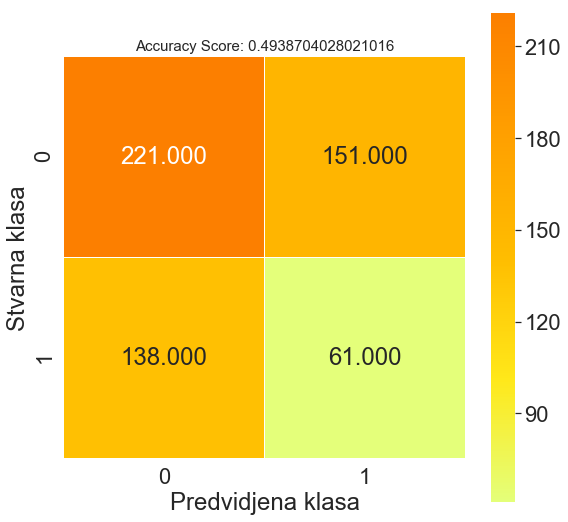

In [99]:
cm = metrics.confusion_matrix(class_labels, predictions)

plt.figure(figsize=(9,9))
sns.set(font_scale=2)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Wistia');
plt.ylabel('Stvarna klasa');
plt.xlabel('Predvidjena klasa');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(class_labels, predictions))
plt.title(all_sample_title, size = 15);
figname = 'RF_c_files_confussion_matrix.png'
#plt.savefig(figname)
plt.show()

In [100]:
# type(class_labels)

In [101]:
from collections import Counter

In [102]:
Counter(class_labels)

Counter({0: 372, 1: 199})

In [103]:
Counter(predictions)

Counter({0: 359, 1: 212})

In [104]:
data = np.empty(shape=(len(instances), 17), dtype=float)

In [105]:
data.shape

(571, 17)

In [106]:
instances[0].strip('\n')

'[19, 48, 13, 29, 130145.77451223352, 137.8125, 2471765661.417352, 5978.571516655727, 610, 0.0072562358276643995, 137320314.52318624, 17935714.54996718, 210, 400, 16, 21, 67]'

In [107]:
#####
j = 0
for i in instances:
    i = i.strip('\n')
    i = i.strip('\[')
    i = i.strip('\]')
    #i = np.array(i)
    #i = np.fromstring(i)
    i = np.array(i.split(','), dtype=float)
    # i = preprocessing.normalize(i.reshape(1,-1))
    i = scaler.transform(i.reshape(1, -1))
    # print(type(i))
    # print(i)
    if j < data.shape[0]:
        data[j] = i
        j += 1

In [108]:
data

array([[ 1.44171815, 24.95762534,  1.13873262, ..., -0.02830084,
         0.97767678,  0.32596634],
       [ 0.03754494,  9.76168778, -0.19299049, ..., -0.17829185,
         0.87812266, -0.235317  ],
       [ 2.44469901, 33.86558874,  0.80580184, ...,  0.15918793,
         1.27633916,  0.67840007],
       ...,
       [ 2.5449971 , 63.20946817,  0.91677877, ...,  0.30917894,
         2.86920516,  1.42242682],
       [ 3.04648753, 75.26141865,  0.80580184, ...,  0.38417445,
         3.66563816,  1.78791365],
       [ 2.64529518, 56.921494  , -0.30396741, ...,  0.12169017,
         2.76965103,  1.27884271]])

In [109]:
type(data)

numpy.ndarray

In [110]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data, class_labels, test_size=0.4, random_state=42)

In [111]:
X_train2.shape

(342, 17)

In [112]:
clf2 = RandomForestClassifier(n_jobs=2, random_state=0)
clf2.fit(X_train2, np.ravel(y_train2))
y_pred2 = clf2.predict(X_test2)
print(metrics.accuracy_score(y_test2, y_pred2))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6069868995633187


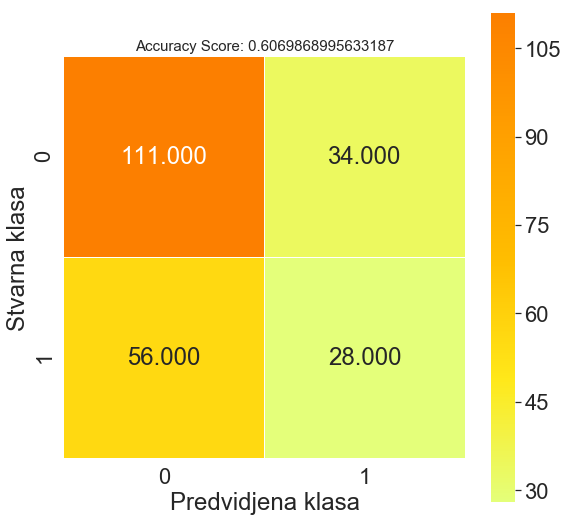

In [113]:
cm = metrics.confusion_matrix(y_test2, y_pred2)

plt.figure(figsize=(9,9))
sns.set(font_scale=2)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Wistia');
plt.ylabel('Stvarna klasa');
plt.xlabel('Predvidjena klasa');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test2, y_pred2))
plt.title(all_sample_title, size = 15);
figname = 'new_data_confussion_matrix.png'
#plt.savefig(figname)
plt.show()

In [114]:
y_pred3 = clf2.predict(X_train2)

In [115]:
cm = metrics.confusion_matrix(y_train2, y_pred3)

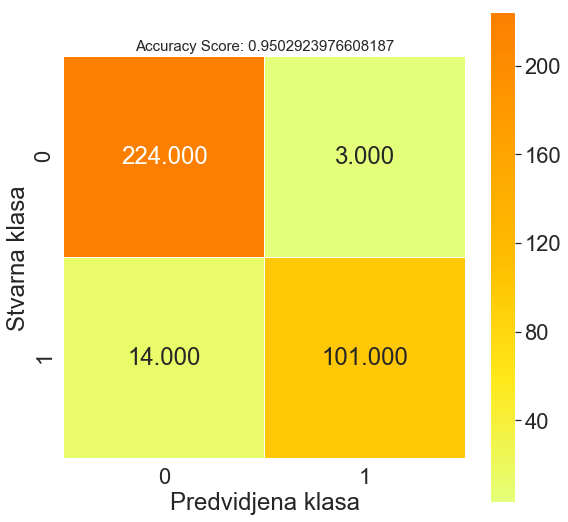

In [116]:
cm = metrics.confusion_matrix(y_train2, y_pred3)

plt.figure(figsize=(9,9))
sns.set(font_scale=2)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Wistia');
plt.ylabel('Stvarna klasa');
plt.xlabel('Predvidjena klasa');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_train2, y_pred3))
plt.title(all_sample_title, size = 15);
figname = 'new_data_confussion_matrix.png'
#plt.savefig(figname)
plt.show()

In [117]:
indices_zeroes = []
indices_ones = []

In [118]:
for val in enumerate(class_labels):
    if val[1] == 0:
        indices_zeroes.append(val[0])
    else:
        indices_ones.append(val[0])
    # print(val[0])

In [119]:
len(indices_ones)

199

In [120]:
len(indices_zeroes)

372

In [121]:
indices_ones

[31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 49,
 50,
 51,
 62,
 63,
 66,
 69,
 74,
 75,
 83,
 86,
 87,
 88,
 89,
 93,
 95,
 98,
 101,
 102,
 110,
 111,
 112,
 117,
 121,
 123,
 124,
 125,
 126,
 130,
 131,
 132,
 136,
 141,
 144,
 145,
 146,
 150,
 151,
 152,
 160,
 161,
 162,
 163,
 166,
 167,
 168,
 169,
 170,
 172,
 173,
 174,
 175,
 176,
 180,
 181,
 185,
 187,
 188,
 190,
 191,
 194,
 195,
 196,
 198,
 199,
 200,
 204,
 206,
 208,
 212,
 218,
 219,
 230,
 231,
 253,
 258,
 260,
 264,
 268,
 270,
 277,
 288,
 289,
 291,
 304,
 308,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 329,
 334,
 336,
 340,
 343,
 344,
 345,
 346,
 347,
 351,
 352,
 357,
 360,
 361,
 362,
 363,
 367,
 368,
 374,
 375,
 376,
 379,
 380,
 381,
 382,
 387,
 390,
 391,
 392,
 393,
 395,
 397,
 399,
 405,
 425,
 436,
 437,
 438,
 439,
 442,
 443,
 452,
 478,
 484,
 489,
 490,
 494,
 499,
 503,
 504,
 510,
 511,
 512,
 

In [122]:
np.average(data[indices_ones][:,11])

7744.270249440335

In [123]:
np.average(data[indices_zeroes][:,11])

7222.9621694840325

In [124]:
np.average(data[indices_ones][:,8])

1.0008924261141041

In [125]:
np.average(data[indices_zeroes][:,8])

0.9342252695984676

In [126]:
np.average(data[indices_ones][:,12])

0.6704836227280381

In [127]:
np.average(data[indices_zeroes][:,12])

0.632600979911093

In [128]:
# github_instance = np.array([8, 353, 14, 140, 1948361.3189646779, 336.5, 220617335959.33817, 218541.19461053805, 2722, 0.0029717682020802376, 12256518664.407677, 655623583.8316141, 1346, 1376, 144, 72, 361], dtype=float)
# github_instance = np.array([5, 37, 8, 5, 1050957.9486631174, 55.52127659574467, 3239695746.7548647, 19450.175652740458, 933, 0.01801111324008431, 179983097.04193693, 58350526.95822137, 614, 319, 94, 17, 42])
# github_instance = np.array([11, 261, 18, 107, 2031006.1313715037, 263.83941605839414, 141380850105.87363, 178619.82390402522, 2504, 0.0037901842527527253, 7854491672.548534, 535859471.7120757, 1364, 1140, 137, 53, 272], dtype=float)
# -------------------------------------
# github_instance = np.array([49, 211, 2, 103, 476426.1581724572, 284.29411764705884, 38506260620.376114, 45148.38475387226, 1390, 0.0035174839644113386, 2139236701.1320064, 135445154.2616168, 537, 853, 51, 54, 260], dtype=float)
# -------------------------------------------
# github_instance = np.array([10, 70, 6, 32, 575623.6626825822, 77.9375, 3496484281.5796075, 14954.223070107917, 827, 0.012830793905372895, 194249126.75442263, 44862669.21032375, 430, 397, 80, 29, 80], dtype=float)
# -------------------------------------------
# github_instance = np.array([3, 23, 6, 13, 462080.56114427367, 58.5974025974026, 1586625502.3403487, 9025.573557934904, 659, 0.017065602836879433, 88145861.24113049, 27076720.67380471, 376, 283, 77, 24, 26], dtype=float)
# github_instance = np.array([3, 34, 6, 13, 64905.57020861779, 130.0, 1096904136.5256405, 2812.574709040104, 435, 0.007692307692307693, 60939118.69586892, 8437724.127120312, 182, 253, 14, 20, 37], dtype=float)


# isnum # github_instance = np.array([2, 17, 6, 5, 3029.874609116446, 29.4, 2618902.417135891, 29.69277116934117, 57, 0.034013605442176874, 145494.57872977172, 89078.31350802351, 14, 43, 5, 21, 19], dtype=float)
# isalpha

# strcmp
# github_instance = np.array([2, 14, 6, 3, 1454.4023793190904, 15.75, 360782.6902198419, 7.635612491425225, 33, 0.06349206349206349, 20043.482789991216, 22906.837474275675, 9, 24, 4, 14, 16], dtype=float)

# putchar
github_instance = np.array([2, 11, 6, 1, 24340.52014006465, 145.0, 511759435.9448593, 1176.4584734364582, 319, 0.006896551724137931, 28431079.774714407, 3529375.4203093746, 145, 174, 6, 12, 13], dtype=float)


In [129]:
github_instance

array([2.00000000e+00, 1.10000000e+01, 6.00000000e+00, 1.00000000e+00,
       2.43405201e+04, 1.45000000e+02, 5.11759436e+08, 1.17645847e+03,
       3.19000000e+02, 6.89655172e-03, 2.84310798e+07, 3.52937542e+06,
       1.45000000e+02, 1.74000000e+02, 6.00000000e+00, 1.20000000e+01,
       1.30000000e+01])

In [130]:
# github_instance = preprocessing.normalize(github_instance.reshape(1,-1))
github_instance = scaler.transform(github_instance.reshape(1, -1))

In [131]:
github_instance = np.delete(github_instance, [0, 1, 2, 6, 9, 10, 16])

In [132]:
github_instance

array([  -0.42361157,  706.24995097,    6.99111858, 1819.54146721,
          0.81980703, 1819.55509571,    0.98254296,    0.69877532,
         -0.40327837,    0.08168966])

In [133]:
prediction = clf.predict(github_instance.reshape(1,-1))

In [134]:
prediction

array([1], dtype=int64)